In [5]:
import numpy as np
import sys
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
import gc
from datetime import datetime, timedelta
import pickle

sys.path.append('/Users/mueller/Projects/GitRepos/ICARUSNoiseAnalysis/noise/')

# Import necessary libraries
from infn import INFNDataset

100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


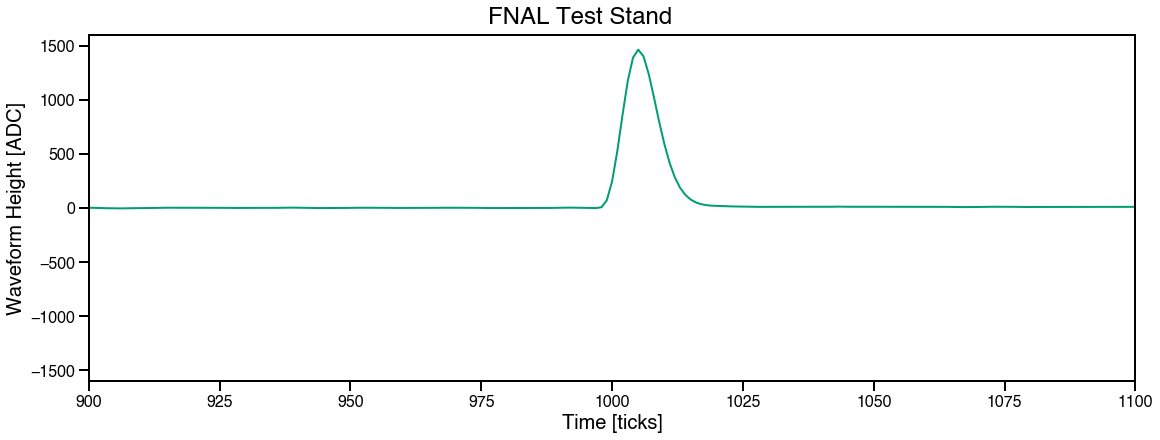

In [13]:
def plot_single_test_waveform(waveforms, ch, scale=2200) -> None:
    """
    Plots a single waveform.

    Parameters
    ----------
    waveforms: np.array
        The waveforms for the component
    ch: int
        The channel number corresponding to the waveform.
    scale: float
        The y-range of the plot. The range will be set to (-scale, scale).
    """
    plt.style.use('../plot_style.mplstyle')

    figure = plt.figure(figsize=(16,6))
    ax = figure.add_subplot()

    waveform = waveforms[ch,:]
    ax.plot(np.arange(4096), waveform, linestyle='-', linewidth=2)
    ax.set_xlim(900,1100)
    ax.set_ylim(-scale, scale)
    ax.set_xlabel('Time [ticks]')
    ax.set_ylabel('Waveform Height [ADC]')
    figure.suptitle('FNAL Test Stand')

data = INFNDataset(f'/Users/mueller/data/infn_data/RUN_000000/', nevts=1)
plot_single_test_waveform(data.events[0].waveforms, 1, scale=1600)

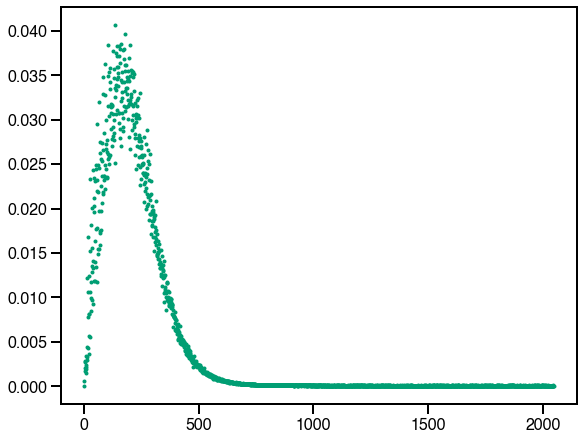

In [3]:
figure = plt.figure(figsize=(8,6))
ax = figure.add_subplot()
ax.scatter(np.arange(2049), data.ffts[0,:])

In [6]:
for r in [100306, 100307]:
    print(f'Processing INFN Run {r}:')
    data = INFNDataset(f'/Users/mueller/data/infn_data/RUN_{r}/', nevts=500)
    data.write(f'/Users/mueller/data/infn_data/infn{r}.npz')

Processing INFN Run 100306:


100%|██████████| 207/207 [08:14<00:00,  2.39s/it]


Processing INFN Run 100307:


100%|██████████| 208/208 [08:16<00:00,  2.39s/it]


Conditions: Reinforced grounding connections
Baseline: Baseline: 2048 [All], 2000 [None]


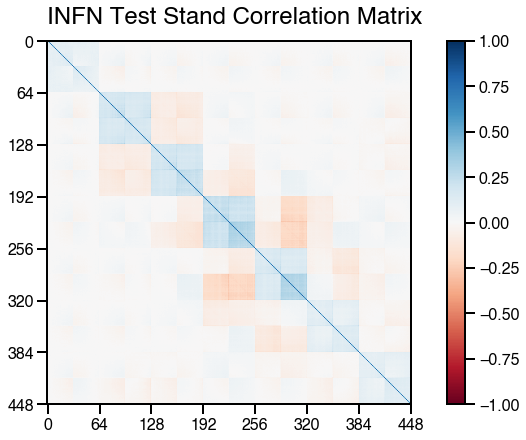

Conditions: No DBBs + tightly coupled cables [All]
Baseline: 2048 [All], 2000 [None]


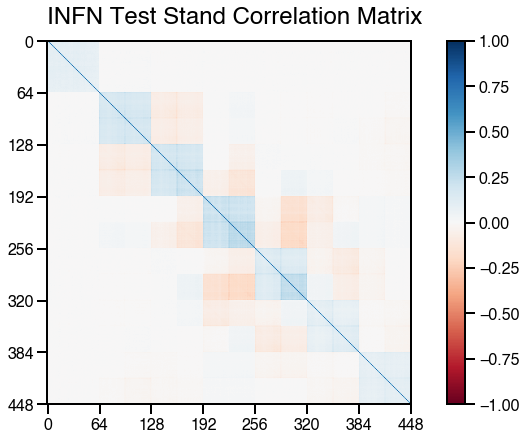

Conditions: No DBBs + No cables [0,1,2,4,5,6] + Cables separated by cardboard [3]
Baseline: 2048 [All], 2000 [None]


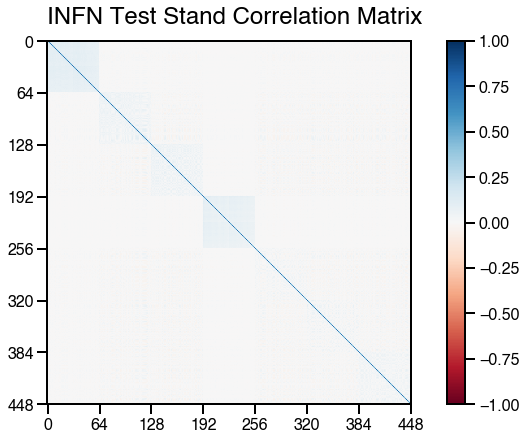

Conditions: No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables [3]
Baseline: 2048 [All], 2000 [None]


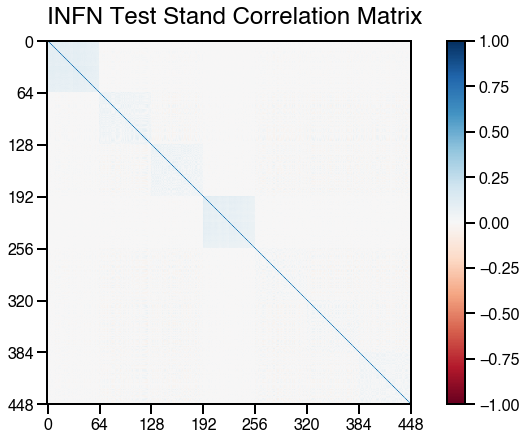

Conditions: No cables [0,1,2,4,5,6] + Tightly coupled cables [3]
Baseline: 2048 [All], 2000 [None]


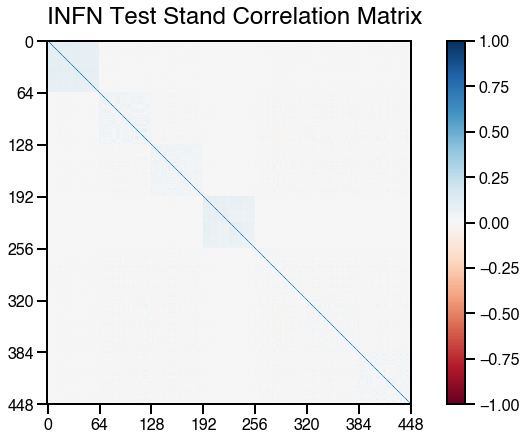

Conditions: No cables [0,1,5,6] + Tightly coupled cables [2,3,4]
Baseline: 2048 [All], 2000 [None]


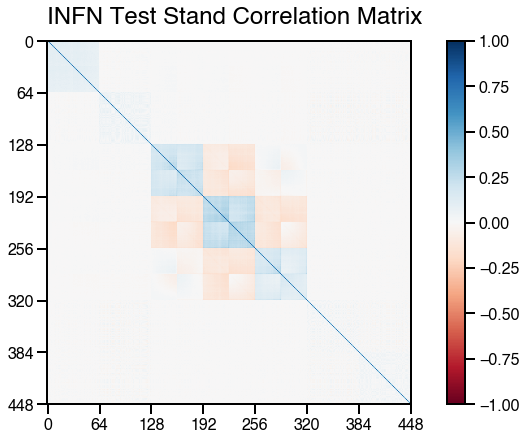

Conditions: No cables [0,1,5,6] + Tightly coupled cables [2,3,4]
Baseline: 2048 [0,1,2,4,5,6], 2000 [3]


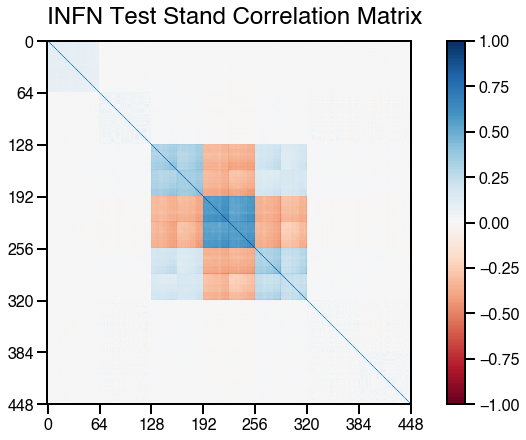

In [4]:
annotations = {100303: ('Reinforced grounding connections', 'Baseline: 2048 [All], 2000 [None]'),
               #100304: ('Reinforced grounding connections', '2048 [0,1,2,4,5,6], 2000 [3]'),
               100305: ('No DBBs + tightly coupled cables [All]', '2048 [All], 2000 [None]'),
               #100306: ('No DBBs + tightly coupled cables [All]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               100307: ('No DBBs + No cables [0,1,2,4,5,6] + Cables separated by cardboard [3]', '2048 [All], 2000 [None]'),
               #100308: ('No DBBs + No cables [0,1,2,4,5,6] + Cables separated by cardboard [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               #100309: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables separated from flange by cardboard [3]', '2048 [All], 2000 [None]'),
               #100310: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables separated from flange by cardboard [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               100311: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [All], 2000 [None]'),
               #100312: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               100313: ('No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [All], 2000 [None]'),
               #100314: ('No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               100315: ('No cables [0,1,5,6] + Tightly coupled cables [2,3,4]', '2048 [All], 2000 [None]'),
               100316: ('No cables [0,1,5,6] + Tightly coupled cables [2,3,4]', '2048 [0,1,2,4,5,6], 2000 [3]')}

for k, v in annotations.items():
    data = INFNDataset(f'/Users/mueller/data/infn_data/infn{k}.npz')
    print(f'Conditions: {v[0]}')
    print(f'Baseline: {v[1]}')
    data.plot_correlation_matrix(boards=7)

Conditions: Reinforced grounding connections
Baseline: 2048 [0,1,2,4,5,6], 2000 [3]


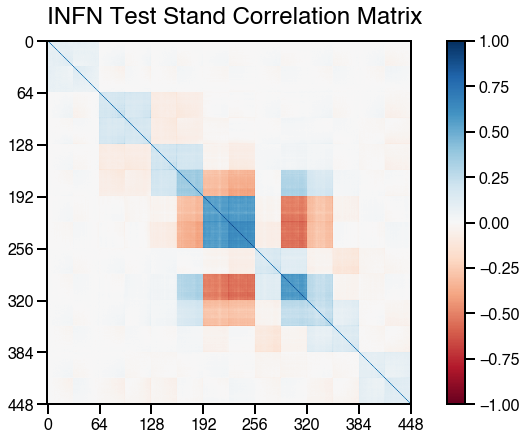

Conditions: No DBBs + tightly coupled cables [All]
Baseline: 2048 [0,1,2,4,5,6], 2000 [3]


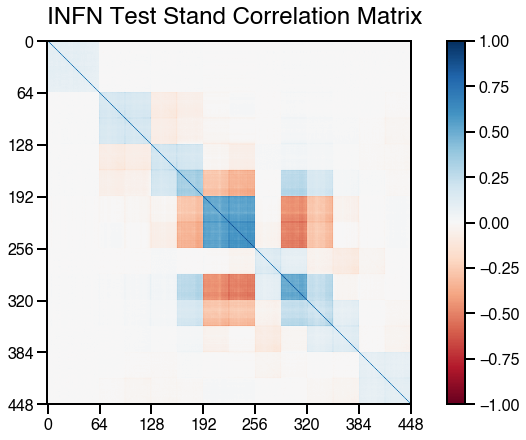

Conditions: No DBBs + No cables [0,1,2,4,5,6] + Cables separated by cardboard [3]
Baseline: 2048 [0,1,2,4,5,6], 2000 [3]


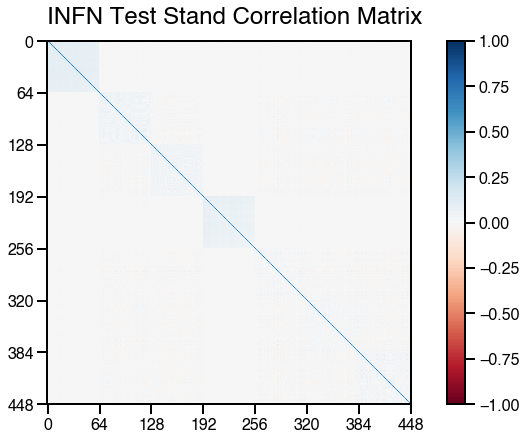

Conditions: No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables [3]
Baseline: 2048 [0,1,2,4,5,6], 2000 [3]


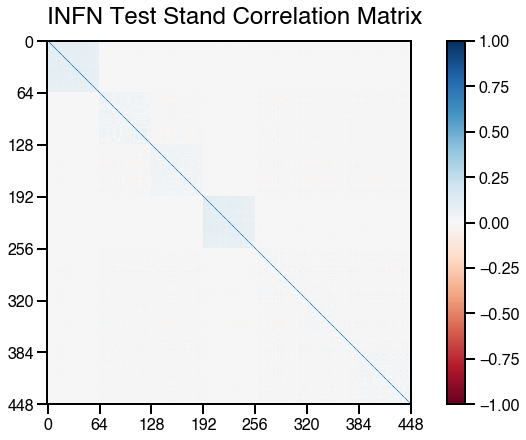

Conditions: No cables [0,1,2,4,5,6] + Tightly coupled cables [3]
Baseline: 2048 [0,1,2,4,5,6], 2000 [3]


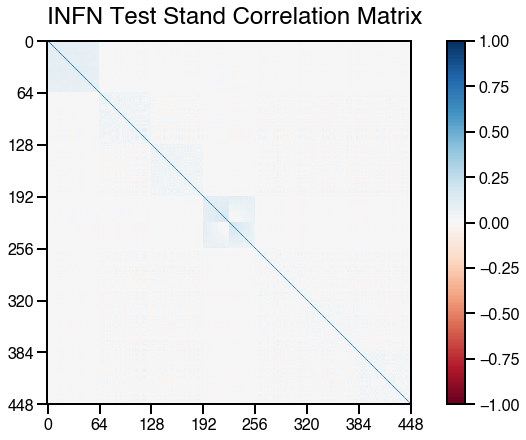

Conditions: No cables [0,1,5,6] + Tightly coupled cables [2,3,4]
Baseline: 2048 [0,1,2,4,5,6], 2000 [3]


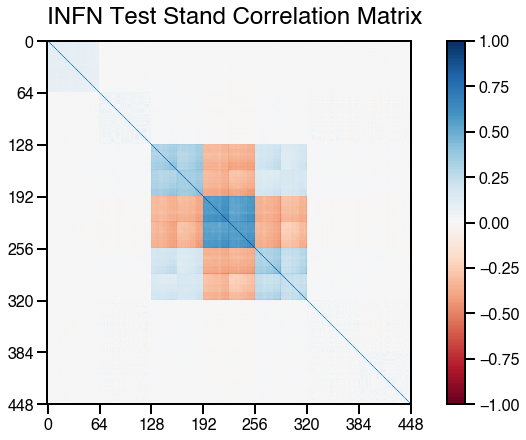

In [3]:
annotations = {#100303: ('Reinforced grounding connections', 'Baseline: 2048 [All], 2000 [None]'),
               100304: ('Reinforced grounding connections', '2048 [0,1,2,4,5,6], 2000 [3]'),
               #100305: ('No DBBs + tightly coupled cables [All]', '2048 [All], 2000 [None]'),
               100306: ('No DBBs + tightly coupled cables [All]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               #100307: ('No DBBs + No cables [0,1,2,4,5,6] + Cables separated by cardboard [3]', '2048 [All], 2000 [None]'),
               100308: ('No DBBs + No cables [0,1,2,4,5,6] + Cables separated by cardboard [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               #100309: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables separated from flange by cardboard [3]', '2048 [All], 2000 [None]'),
               #100310: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables separated from flange by cardboard [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               #100311: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [All], 2000 [None]'),
               100312: ('No DBBs + No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               #100313: ('No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [All], 2000 [None]'),
               100314: ('No cables [0,1,2,4,5,6] + Tightly coupled cables [3]', '2048 [0,1,2,4,5,6], 2000 [3]'),
               #100315: ('No cables [0,1,5,6] + Tightly coupled cables [2,3,4]', '2048 [All], 2000 [None]')}#,
               100316: ('No cables [0,1,5,6] + Tightly coupled cables [2,3,4]', '2048 [0,1,2,4,5,6], 2000 [3]')}

for k, v in annotations.items():
    data = INFNDataset(f'/Users/mueller/data/infn_data/infn{k}.npz')
    print(f'Conditions: {v[0]}')
    print(f'Baseline: {v[1]}')
    data.plot_correlation_matrix(boards=7)